<a href="https://colab.research.google.com/github/stunnedbud/CursoRedesProfundas/blob/main/Tarea_1_Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1 Ejercicio 2. Retropropagación en red densa

Para éste inciso se requiere implementar el algoritmo de retropropagación en NumPy para alguna tarea de clasificación binaria. 

La siguiente implementación está basada en la clase de retropropagación, pero fue modificada para considerar una red densa con dos capas ocultas. Por lo tanto la tarea de clasificación será aproximar la función lógica XOR ($\otimes$), la cual está definida de la siguiente manera:

| $x_1$ | $x_2$ | $y$
| ------------- |:-------------:| -----:|
|0 |0 |0|
|0 |1 |1|
|1 |0 |1|
|1 |1 |0|


In [ ]:
import numpy as np

Nuestra red neuronal densa estará compuesta por una capa de 2 entradas ($x_1$ y $x_2$), dos capas ocultas con 10 neuronas cada una con funciones de activación sigmoide y una capa de salida con una sola neurona con función de activación sigmoide. La función de activación sigmoide o logístca se define como:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

In [ ]:
def sigmoide(z):
    return 1 / (1 + np.exp(-z))

La función sigmoide tiene una derivada que está expresada en términos de la misma función, esto es, 

$$
\frac{\partial \sigma (z)}{\partial z} = \sigma(z) (1 - \sigma(z))
$$

In [ ]:
def derivada_sigmoide(x):
    return np.multiply(sigmoide(x), (1.0 - sigmoide(x)))

Podemos ver la operación XOR como una tarea de clasificación binaria a partir de 2 entradas. Por lo tanto, usaremos la función de pérdida de entropía cruzada binaria:

$$
ECB(\mathbf{y}, \mathbf{\hat{y}})  = -\sum_{i=1}^N \left[ y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log (1 - \hat{y}^{(i)}) \right]
$$

In [ ]:
def entropia_cruzada_binaria(y, p):
    p[p == 0] = np.nextafter(0., 1.)
    p[p == 1] = np.nextafter(1., 0.)
    return -(np.log(p[y == 1]).sum() + np.log(1 - p[y == 0]).sum())

Asimismo, calcularemos la exactitud para medir el rendimiento del modelo aprendido por la red neuronal densa:

$$
exactitud = \frac{correctos}{total}
$$

In [ ]:
def exactitud(y, y_predicha):
    return (y == y_predicha).mean() * 100

Ahora, definimos la función que propaga hacia adelante una entrada $\mathbf{x}^{i}$. Como la red está compuesta de 3 capas densas (2 ocultas y 1 de salida), tenemos 3 matrices de pesos con sus correspondientes vectores de sesgos $\{\mathbf{W}^{\{1\}}, \mathbf{b}^{\{1\}}\}$, $\{\mathbf{W}^{\{2\}}, \mathbf{b}^{\{2\}}\}$, y $\{\mathbf{W}^{\{3\}}, \mathbf{b}^{\{3\}}\}$ de las capas ocultas y la capa de salida respectivamente. Así, podemos llevar a cabo la propagación hacia adelante en esta red de la siguiente manera:

$$
	\begin{split}
				\mathbf{a}^{\{1\}} & =  \mathbf{x}^{(i)}\\
				\mathbf{z}^{\{2\}} & =  \mathbf{W}^{\{1\}} \cdot \mathbf{a}^{\{1\}} + \mathbf{b}^{\{1\}}\\
				\mathbf{a}^{\{2\}} & =  \sigma(\mathbf{z}^{\{2\}})\\
				\mathbf{z}^{\{3\}} & =  \mathbf{W}^{\{2\}} \cdot \mathbf{a}^{\{2\}}  + \mathbf{b}^{\{2\}}\\
				\mathbf{a}^{\{3\}} & =  \sigma(\mathbf{z}^{\{3\}})\\
				\mathbf{z}^{\{4\}} & =  \mathbf{W}^{\{3\}} \cdot \mathbf{a}^{\{3\}}  + \mathbf{b}^{\{3\}}\\
				\mathbf{a}^{\{4\}} & =  \sigma(\mathbf{z}^{\{4\}})\\
				\hat{y}^{(i)} & =  \mathbf{a}^{\{4\}}\\
\end{split}
$$


In [ ]:
def hacia_adelante(x, W1, b1, W2, b2, W3, b3):
    z2 = np.dot(W1.T, x[:, np.newaxis]) + b1
    a2 = sigmoide(z2)
    z3 = np.dot(W2.T, a2) + b2
    a3 = sigmoide(z3)
    z4 = np.dot(W3.T, a3) + b3
    y_hat = sigmoide(z4) 
    return z2, a2, z3, a3, z4, y_hat

Finalmente, definimos la función para entrenar nuestra red neuronal usando gradiente descendente. Para calcular el gradiente de la función de pérdida respecto a los pesos y sesgos en cada capa empleamos el algoritmo de retropropagación.



In [ ]:
def retropropagacion(X, y, alpha = 0.01, n_epocas = 100, n_ocultas = 10):
    n_ejemplos = X.shape[0]
    n_entradas = X.shape[1]
        
    # Inicialización de las matrices de pesos W y V
    W1 = np.sqrt(1.0 / n_entradas) * np.random.randn(n_entradas, n_ocultas)
    b1 = np.zeros((n_ocultas, 1))
    
    W2 = np.sqrt(1.0 / n_ocultas) * np.random.randn(n_ocultas, 1)
    b2 = np.zeros((n_ocultas, 1))

    W3 = np.sqrt(1.0 / n_ocultas) * np.random.randn(n_ocultas, 1)
    b3 = np.zeros((1, 1))
    
    perdidas = np.zeros((n_epocas))
    exactitudes = np.zeros((n_epocas))
    y_predicha = np.zeros((y.shape))
    for i in range(n_epocas):
        for j in range(n_ejemplos):
            z2, a2, z3, a3, z4, y_hat = hacia_adelante(X[j], W1, b1, W2, b2, W3, b3)

            # cálculo de gradientes para W3 y b3 por retropropagación
            dz4 = y_hat - y[j]
            dW3 = np.outer(a3,dz4)
            db3 = dz4

            # cálculo de gradientes para W2 y b2 por retropropagación
            dz3 = np.dot(W3, dz4) * derivada_sigmoide(z3)
            dW2 = np.outer(a2,dz3)
            db2 = dz3

            # cálculo de gradientes para W1 y b1 por retropropagación
            dz2 = np.dot(W2.T, dz3) * derivada_sigmoide(z2)
            dW1 = np.outer(X[j], dz2)
            db1 = dz2
            
            ####################################
            # IMPORTANTE 
            # la actualización de los parámetros
            # debe hacerse de forma simultánea
            W3 = W3 - alpha * dW3
            b3 = b3 - alpha * db3
            W2 = W2 - alpha * dW2
            b2 = b2 - alpha * db2
            W1 = W1 - alpha * dW1
            b1 = b1 - alpha * db1

            y_predicha[j] = y_hat
            
        # calcula la pérdida en la época
        perdidas[i] = entropia_cruzada_binaria(y, y_predicha)
        exactitudes[i] = exactitud(y, np.round(y_predicha))
        print('Epoch {0}: Pérdida = {1} Exactitud = {2}'.format(i, 
                                                              perdidas[i], 
                                                              exactitudes[i]))

    return W1, W2, W3, perdidas, exactitudes

## Prueba de funcionamiento

Para entrenar y probar nuestra red, generamos los ejemplos correspondientes a la operación XOR.

In [ ]:
# ejemplo (XOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 1, 1, 0]]).T

Finalmente, entrenamos nuestra red con estos ejemplos por 500 épocas usando una tasa de aprendizaje $\alpha = 0.5$.

In [ ]:
np.random.seed(0)
W1, W2, W3, perdidas, exactitudes = retropropagacion(X, y, alpha = 0.5, n_epocas = 500, n_ocultas = 10)

Streaming output truncated to the last 5000 lines.
Epoch 95000: Pérdida = 2.0890933414660715 Exactitud = 75.0
Epoch 95001: Pérdida = 2.0890933408407264 Exactitud = 75.0
Epoch 95002: Pérdida = 2.0890933402153955 Exactitud = 75.0
Epoch 95003: Pérdida = 2.0890933395900784 Exactitud = 75.0
Epoch 95004: Pérdida = 2.0890933389647754 Exactitud = 75.0
Epoch 95005: Pérdida = 2.0890933383394854 Exactitud = 75.0
Epoch 95006: Pérdida = 2.0890933377142105 Exactitud = 75.0
Epoch 95007: Pérdida = 2.0890933370889497 Exactitud = 75.0
Epoch 95008: Pérdida = 2.0890933364637023 Exactitud = 75.0
Epoch 95009: Pérdida = 2.089093335838469 Exactitud = 75.0
Epoch 95010: Pérdida = 2.0890933352132492 Exactitud = 75.0
Epoch 95011: Pérdida = 2.0890933345880445 Exactitud = 75.0
Epoch 95012: Pérdida = 2.089093333962853 Exactitud = 75.0
Epoch 95013: Pérdida = 2.0890933333376758 Exactitud = 75.0
Epoch 95014: Pérdida = 2.0890933327125123 Exactitud = 75.0
Epoch 95015: Pérdida = 2.089093332087363 Exactitud = 75.0
Epoch 95



Podemos graficar el valor de la pérdida y la exactitud en cada época, para ver el comportamiento de nuestra red durante el entrenamiento:

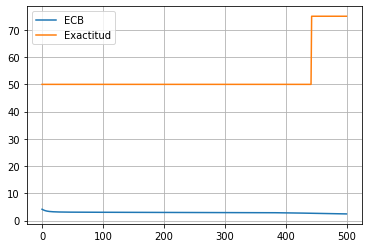

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(perdidas.size), perdidas, label='ECB')
plt.plot(np.arange(exactitudes.size), exactitudes, label='Exactitud')
plt.legend()
plt.grid(True)
plt.show()

## Discusión


En la gráfica anterior podemos observar que la red neuronal funciona correctamente, en el sentido en que en cada época se va reduciendo la pérdida y asimismo mejora la exactitud con el tiempo. Sin embargo, esta red nunca logra una exactitud mayor a 75, incluso dejando que corra por 100,000 epocas. Esto se debe a que aunque sí se va reduciendo en cada época, el valor de pérdida baja extremadamente lento.

Me parece claro que el motivo de ésta lentitud es que la red es demasiado grande para la función que se busca aproximar. Podemos confirmar que éste es el caso pues la versión de esta red con 1 capa oculta sí logro una exactitud de 100, y bajo los mismos parámetros su pérdida decrementaba más rápido.

Como vimos en clase, al agregar capas ocultas a las redes neuronales profundas empiezan a surgir problemas, principalmente el desvanecimiento de gradiente: brevemente esto es que conforme más capas ocultas existan, el valor de la gradiente que se retropropaga estará más "disminuido" para cuando llegue a las capas iniciales, lo cual hace el entrenamiento muy lento. Ya que en esta red no implementamos estrategias para reducir este problema, por ejemplo usando funciones de activación ReLU, es de esperar que su desempeño en el entrenamiento sea tan lento.